<a href="https://colab.research.google.com/github/AuraFrizzati/ChatGPT-Prompt-Engineering-for-Developers/blob/main/02_Iterative_Prompt_Development.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Iterative prompt development**

It doesn't matter if the first prompt you create to achieve task doesn't work perfectly. What matters most is the **process for getting the prompt working** for your application.

There are some **frameworks** that help to think about **how to iteratively develop a prompt**.

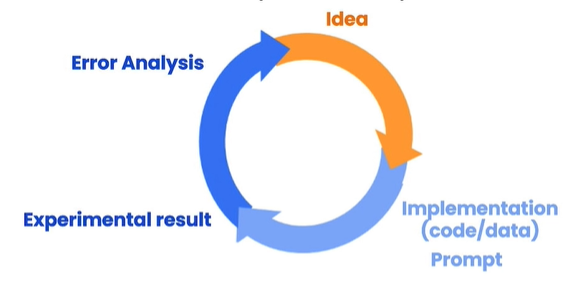

- You have an idea about a prompt  
- Make a first attempt to write the prompt  
- Run the prompt  
- Verify the output you get and if it doesn't obtain the required result, repeat again the cycle...

**Prompt guidelines**:
- Be clear and specific  
- Analyse why the result does not give the desired output  
- Refine the idea of the prompt  
- Repeat ...



In this lesson, you'll **iteratively analyze and refine your prompts** to generate marketing copy from a product fact sheet.

## **Setup**

In [ ]:
import openai
import os

from dotenv import load_dotenv, find_dotenv
_ = load_dotenv(find_dotenv()) # read local .env file

openai.api_key  = os.getenv('OPENAI_API_KEY')

In [ ]:
import openai
import os

from dotenv import load_dotenv, find_dotenv
_ = load_dotenv(find_dotenv()) # read local .env file

openai.api_key  = os.getenv('OPENAI_API_KEY')

## **Generate a marketing product description from a product fact sheet**

In [ ]:
fact_sheet_chair = """
OVERVIEW
- Part of a beautiful family of mid-century inspired office furniture, 
including filing cabinets, desks, bookcases, meeting tables, and more.
- Several options of shell color and base finishes.
- Available with plastic back and front upholstery (SWC-100) 
or full upholstery (SWC-110) in 10 fabric and 6 leather options.
- Base finish options are: stainless steel, matte black, 
gloss white, or chrome.
- Chair is available with or without armrests.
- Suitable for home or business settings.
- Qualified for contract use.

CONSTRUCTION
- 5-wheel plastic coated aluminum base.
- Pneumatic chair adjust for easy raise/lower action.

DIMENSIONS
- WIDTH 53 CM | 20.87”
- DEPTH 51 CM | 20.08”
- HEIGHT 80 CM | 31.50”
- SEAT HEIGHT 44 CM | 17.32”
- SEAT DEPTH 41 CM | 16.14”

OPTIONS
- Soft or hard-floor caster options.
- Two choices of seat foam densities: 
 medium (1.8 lb/ft3) or high (2.8 lb/ft3)
- Armless or 8 position PU armrests 

MATERIALS
SHELL BASE GLIDER
- Cast Aluminum with modified nylon PA6/PA66 coating.
- Shell thickness: 10 mm.
SEAT
- HD36 foam

COUNTRY OF ORIGIN
- Italy
"""

In [ ]:
fact_sheet_chair = """
OVERVIEW
- Part of a beautiful family of mid-century inspired office furniture, 
including filing cabinets, desks, bookcases, meeting tables, and more.
- Several options of shell color and base finishes.
- Available with plastic back and front upholstery (SWC-100) 
or full upholstery (SWC-110) in 10 fabric and 6 leather options.
- Base finish options are: stainless steel, matte black, 
gloss white, or chrome.
- Chair is available with or without armrests.
- Suitable for home or business settings.
- Qualified for contract use.

CONSTRUCTION
- 5-wheel plastic coated aluminum base.
- Pneumatic chair adjust for easy raise/lower action.

DIMENSIONS
- WIDTH 53 CM | 20.87”
- DEPTH 51 CM | 20.08”
- HEIGHT 80 CM | 31.50”
- SEAT HEIGHT 44 CM | 17.32”
- SEAT DEPTH 41 CM | 16.14”

OPTIONS
- Soft or hard-floor caster options.
- Two choices of seat foam densities: 
 medium (1.8 lb/ft3) or high (2.8 lb/ft3)
- Armless or 8 position PU armrests 

MATERIALS
SHELL BASE GLIDER
- Cast Aluminum with modified nylon PA6/PA66 coating.
- Shell thickness: 10 mm.
SEAT
- HD36 foam

COUNTRY OF ORIGIN
- Italy
"""

`Introducing our stunning mid-century inspired office chair, the perfect addition to any home or business setting. Part of a beautiful family of office furniture, including filing cabinets, desks, bookcases, meeting tables, and more, this chair is available in several options of shell color and base finishes to suit your style. Choose from plastic back and front upholstery (SWC-100) or full upholstery (SWC-110) in 10 fabric and 6 leather options.`

`The chair is constructed with a 5-wheel plastic coated aluminum base and features a pneumatic chair adjust for easy raise/lower action. It is available with or without armrests and is qualified for contract use. The base finish options are stainless steel, matte black, gloss white, or chrome.`

`Measuring at a width of 53 cm, depth of 51 cm, and height of 80 cm, with a seat height of 44 cm and seat depth of 41 cm, this chair is designed for ultimate comfort. You can also choose between soft or hard-floor caster options and two choices of seat foam densities: medium (1.8 lb/ft3) or high (2.8 lb/ft3). The armrests are available in either an armless or 8 position PU option.`

`The materials used in the construction of this chair are of the highest quality. The shell base glider is made of cast aluminum with modified nylon PA6/PA66 coating and has a shell thickness of 10 mm. The seat is made of HD36 foam, ensuring maximum comfort and durability.`

`This chair is made in Italy and is the perfect combination of style and functionality. Upgrade your workspace with our mid-century inspired office chair today!`




## **Issue 1: The text is too long**

- **Limit the number of words/sentences/characters**.

In [ ]:
prompt = f"""
Your task is to help a marketing team create a 
description for a retail website of a product based 
on a technical fact sheet.

Write a product description based on the information 
provided in the technical specifications delimited by 
triple backticks.

Use at most 50 words.

Technical specifications: ```{fact_sheet_chair}```
"""
response = get_completion(prompt)
print(response)

`Introducing our mid-century inspired office chair, part of a beautiful furniture family. Available in various shell colors and base finishes, with plastic or full upholstery options in fabric or leather. Suitable for home or business use, with a 5-wheel base and pneumatic chair adjust. Made in Italy.`

In [ ]:
len(response.split(' '))

`47`

Not too bad, especially because LLMs are not too good in following instructions with a precise word count.

## **Issue 2. Text focuses on the wrong details**

Ask it to focus on the aspects that are relevant to the intended audience.

In [ ]:
prompt = f"""
Your task is to help a marketing team create a 
description for a retail website of a product based 
on a technical fact sheet.

Write a product description based on the information 
provided in the technical specifications delimited by 
triple backticks.

The description is intended for furniture retailers, 
so should be technical in nature and focus on the 
materials the product is constructed from.

Use at most 50 words.

Technical specifications: ```{fact_sheet_chair}```
"""
response = get_completion(prompt)
print(response)

`Introducing our mid-century inspired office chair, perfect for both home and business settings. With a range of shell colors and base finishes, including stainless steel and matte black, this chair is available with or without armrests. The 5-wheel plastic coated aluminum base and pneumatic chair adjust make it easy to raise and lower. Made in Italy with a cast aluminum shell and HD36 foam seat.`

In [ ]:
prompt = f"""
Your task is to help a marketing team create a 
description for a retail website of a product based 
on a technical fact sheet.

Write a product description based on the information 
provided in the technical specifications delimited by 
triple backticks.

The description is intended for furniture retailers, 
so should be technical in nature and focus on the 
materials the product is constructed from.

At the end of the description, include every 7-character 
Product ID in the technical specification.

Use at most 50 words.

Technical specifications: ```{fact_sheet_chair}```
"""
response = get_completion(prompt)
print(response)

`Introducing our mid-century inspired office chair, perfect for home or business settings. With a range of shell colors and base finishes, and the option of plastic or full upholstery, this chair is both stylish and comfortable. Constructed with a 5-wheel plastic coated aluminum base and pneumatic chair adjust, it's also practical. Available with or without armrests and suitable for contract use. Product ID: SWC-100, SWC-110.`

## **Issue 3. Description needs a table of dimensions**
- Ask it to extract information and organize it in a table

In [ ]:
prompt = f"""
Your task is to help a marketing team create a 
description for a retail website of a product based 
on a technical fact sheet.

Write a product description based on the information 
provided in the technical specifications delimited by 
triple backticks.

The description is intended for furniture retailers, 
so should be technical in nature and focus on the 
materials the product is constructed from.

At the end of the description, include every 7-character 
Product ID in the technical specification.

After the description, include a table that gives the 
product's dimensions. The table should have two columns.
In the first column include the name of the dimension. 
In the second column include the measurements in inches only.

Give the table the title 'Product Dimensions'.

Format everything as HTML that can be used in a website. 
Place the description in a <div> element.

Technical specifications: ```{fact_sheet_chair}```
"""

response = get_completion(prompt)
print(response)

<div>
<h2>Mid-Century Inspired Office Chair</h2>
<p>Introducing our mid-century inspired office chair, part of a beautiful family of office furniture that includes filing cabinets, desks, bookcases, meeting tables, and more. This chair is available in several options of shell color and base finishes, allowing you to customize it to your liking. You can choose between plastic back and front upholstery or full upholstery in 10 fabric and 6 leather options. The base finish options are stainless steel, matte black, gloss white, or chrome. The chair is also available with or without armrests, making it suitable for both home and business settings. Plus, it's qualified for contract use, ensuring its durability and longevity.</p>
<p>The chair's construction features a 5-wheel plastic coated aluminum base and a pneumatic chair adjust for easy raise/lower action. You can also choose between soft or hard-floor caster options and two choices of seat foam densities: medium (1.8 lb/ft3) or high (2.8 lb/ft3). The armrests are also customizable, with the option of armless or 8 position PU armrests.</p>
<p>The chair's shell base glider is made of cast aluminum with modified nylon PA6/PA66 coating, with a shell thickness of 10 mm. The seat is made of HD36 foam, ensuring comfort and support during long work hours. This chair is made in Italy, ensuring its quality and craftsmanship.</p>
<h3>Product ID(s): SWC-100, SWC-110</h3>
<table>
  <caption>Product Dimensions</caption>
  <tr>
    <th>Width</th>
    <td>53 cm | 20.87"</td>
  </tr>
  <tr>
    <th>Depth</th>
    <td>51 cm | 20.08"</td>
  </tr>
  <tr>
    <th>Height</th>
    <td>80 cm | 31.50"</td>
  </tr>
  <tr>
    <th>Seat Height</th>
    <td>44 cm | 17.32"</td>
  </tr>
  <tr>
    <th>Seat Depth</th>
    <td>41 cm | 16.14"</td>
  </tr>
</table>
</div>









In [ ]:
from IPython.display import display, HTML
display(HTML(response))

### **Try experimenting on your own!**

In [ ]:
prompt = f"""
Your task is to help a marketing team create a 
description for a retail website of a product based 
on a technical fact sheet.

Write a product description based on the information 
provided in the technical specifications delimited by 
triple backticks.

The description is intended to be comic and funny and
it should be rhymed

Use at most 50 words.

Technical specifications: ```{fact_sheet_chair}```
"""
response = get_completion(prompt)
print(response)

```Introducing the chair of your dreams, \
Fit for both home and office schemes. \
Mid-century style with modern flair, \
Available in colors beyond compare.```

```Choose plastic or full upholstery, \
In fabrics or leather of your discovery. \
Base finishes in stainless steel or chrome, \
Matte black or gloss white, bring it home.```

```Adjustable height with pneumatic ease, \
Soft or hard-floor casters, oh yes please! \
Armrests or not, it's up to you, \
This Italian beauty is tried and true.```

```With a 5-wheel base and HD36 foam, \
This chair will make you feel right at home. \
So don't wait, add it to your cart, \
And let this chair be the start.```